# **SIMULAÇÃO DE SISTEMAS: MONTE CARLO**
### Avaliação Somativa 03

Gabriel Przytocki; Valdemar Ceccon; Pedro Contessoto <br>
Maio, 2022

---

In [1]:
# importações necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
plt.rcParams["figure.figsize"] = (8,4)

## 1. **INTRODUÇÃO**
Em diversos problemas, especialmente os clássicos de programação linear, é comum realizar a modelagem das variáveis para otimizar alguma solução, seja atingindo valores mínimos ou máximos, para encontrar uma solução ideal. Contudo, existem diversas situações do mundo real em que não sabemos com precisão o valor de cada uma das variáveis, ou seja, essas variáveis não são constantes, são aleatórias, ou probabilísticas. Nesse sentido, como exemplo, podemos citar o lançamento de uma moeda honesta (a probabilidade de obter cara é $\frac{1}{2}$), lançamento de um dado honesto (probabilidade de $\frac{1}{6}$ para cada face), entre outros. Considerando o aspecto probabilístico das variáveis, é natural a ideia de simulação: modelamos um sistema ou processo, e realizamos uma simulação, de maneira que as variáveis aleatórias são reproduzidas através de "sorteios", ou geração de escolhas aleatórias. Dessa maneira simulamos um determinado problema ou contexto, entendemos aspectos probabilísticos e assim podemos tomar decisões mais acuradas. A essa simulação baseada em geração de números aleatórios denomina-se simulação **Monte Carlo**.

## 2. **EMPRESA E PROBLEMA DE DECISÃO**
O cassino "**Caligula's Palace**", trabalha diretamente com apostas, sorteios, jogos e probabilidades. A empresa recém comprou máquinas de caça níqueis de um fornecedor exclusivo, cuja tecnologia e aparência são chamativas e atraentes para novo clientes. O cassino recém inaugurou e comprou um lote dessas máquinas, e deseja fazer uma "promoção" para alavancar seu movimento; a promoção consiste em: além de receber os prêmios em caso de acertar um caça níquel, o cassino irá multiplicar o valor gasto na aposta pelo cliente por uma constante $c$, potencializando seus ganhos como bonificação. Em caso de perda, o cliente pederá somente o valor apostado. Essa promoção visa estimular o movimento e a inauguração do cassino. Como exemplo, temos um apostador que gasta R\$ 50,00 em uma tentativa no caça níquel, e acaba por ganhar; se a constante fosse $c=4$, o prêmio seria o valor apostado multiplicado por 4, ou seja, R\$ 200,00. O chamativo da promoção é não tornar fixo os ganhos, abrindo margem para potenciais ganhos elevados. Existe ainda um adicional: a chance de acertar um caça níquel é consideravelmente elevada (em torno de 11%). Como adicional de segurança, o valor máximo permitido para apostas é R\$ 1.000.000,00. Considerando o contexto e a motivação da empresa, o cassino deseja encontrar um valor para $c$ que seja atraente para clientes externos, ou seja, um valor suficientemente alto para motivar os apostadores, mas suficiente para o cassino gerar lucro. Por exemplo, caso $c=1$, o cassino teria muito lucro, pois seria extremamente prejudicial para os apostadores (a recompensa seria a própria aposta), e por ser um valor baixo, estes não se sentiriam motivados a apostar. Nesse contexto, qual o valor ideal para $c$? Qual o melhor valor para $c$ que gera lucro para o cassino, mas ainda sim não gera tanto prejuízo, em média, aos apostadores, possibilitando ganhos elevados e atraindo novos clientes?

## 3. **SIMULAÇÃO DE SISTEMAS – MONTE CARLO**
### 3.1. Considerações Gerais 
A simulação de Monte Carlo objetiva reproduzir os aspectos probabilísticos de um determinado problema, guiando para melhores decisões. Nesse sentido, é fundamental que o problema seja modelado, por exemplo de maneira computacional, e que valores aleatórios (ou, no caso da computação, pseudo-aleatórios) sejam gerados, simulando o comportamento das variáveis. A ideia da simulação é gerar $n$ iterações, ou seja, reproduzir em massa o sistema e analisar seu comportamento. Ao final, temos uma ideia dos resultados, seja melhores decisões a se tomar, melhores probabilidades com a escolha $x$, otimização do valor de $y$, entre diversas aplicações.

### 3.2. Aspectos Teóricos da Simulação Monte Carlo
A simulação de Monte Carlo utiliza da geração de números aleatórios. No método chamado *Linear Congruential Generator*, nós geramos uma sequência de números pseudo-aleatórios através da relação de recorrência:

$$X_{n+1} = (aX_n + c) \mod m$$

onde $X_0$ é a semente e $m$, $a$ e $c$ são inteiros maiores do que zero.

In [3]:
def random_number(seed, a, c, m):
    n = (a*seed + c)%m
    return n

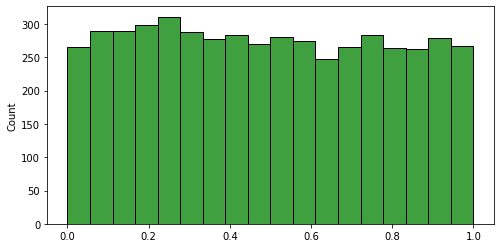

In [4]:
a = 7**5
c = 0
m = 2**31 - 1
seed = 0.5

n = 5000
Xi = seed
X = [seed]

for i in range(n):
    Xi = random_number(Xi, a, c, m)
    X.append(Xi/m)

sns.histplot(X, color='g');

Observamos que ao gerar 5000 números pseudo-aleatórios, obtemos uma distribuição uniforme, ou seja, a ocorrência de qualquer um dos números é equiprovável.

Para esse trabalho, vamos utilizar o gerador de números pseudo-aleatórios da biblioteca `random`.

In [5]:
# gerando um número pseudo-aleatório de 1 a 9
random.randint(1,9)

6

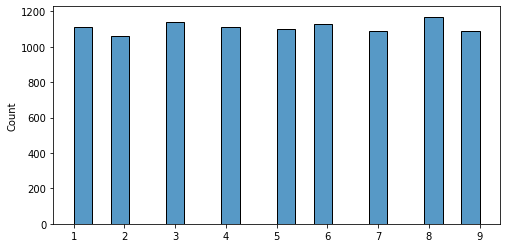

In [6]:
s = []
for i in range(10000):
    s.append(random.randint(1,9))

sns.histplot(s);

Assim como no método anterior, observamos uma distribuição uniforme, ou seja, a probabilidade de cada um dos números ocorrer é igual.

### 3.3. Algoritmo para a Simulação de Monte Carlo
Não existe um algoritmo fixo para realizar simulações de Monte Carlo, porém existe a ideia geral de que qualquer processo de simulação que gere números aleatórios em massa, é considerada uma simulação Monte Carlo.

De maneira geral, podemos descrever a simulação de Monte Carlo através dos seguintes passos:

1. Obter distribuição de probabilidade das variáveis (se necessário, mensurar)
2. Modelar o problema
3. Desenvolver/escolher um método para geração de números pseudo-aleatórios
4. Executar a simulação
5. Analisar os resultados obtidos

Acerca do nosso problema proposto, foi desenvolvido um algoritmo que simula um apostador executando $k$ vezes o caça níquel. Ademais, desenvolvemos um algoritmo de Monte Carlo que repete $n$ vezes o processo do apostador, salvando os resultados obtidos. Segue abaixo as funções criadas.


In [7]:
def run_nickel(sample_space=(1,9), seed=None) -> bool:
    """Executa o caça níquel e retorna True em caso de
    acerto, False caso contrário"""
    if seed:
        random.seed(seed)

    choice = random.randint(*sample_space)
    nickel = random.randint(*sample_space)

    if choice == nickel:
        hit = True
    else:
        hit = False
    return hit

In [8]:
def plot_graph(x=None, 
               y=None, 
               title=None, 
               xlabel=None, 
               ylabel=None, 
               xlim=None):
    """Realiza a plotagem de um gráfico"""
    if x and y:
        plt.plot(x, y, linewidth=1)
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xlim([0, xlim]);
    plt.show();

In [9]:
def simulate(max_prize_draw_runs, 
             bet=1, 
             prize_mult=1,
             balance_value=1000,
             function=run_nickel,
             plot=True,
             plot_details=False,
             seed=None) -> tuple:
    """Simula um apostador no caça níquel, ao longo de
    n iterações. Retorna os dados resultantes"""
    balance = [balance_value]
    prize_draw_runs = [0]
    wins_probs = []
    num_wins = 0
    
    while prize_draw_runs[-1] < max_prize_draw_runs:
        got_win = function(seed=seed)
        if got_win:
            balance.append(balance[-1] + prize_mult * bet)
            num_wins += 1
        else:
            balance.append(balance[-1] - bet)

        if prize_draw_runs[-1] > 0:
            wins_probs.append(num_wins/prize_draw_runs[-1])
        prize_draw_runs.append(prize_draw_runs[-1] + 1)
    
    if plot:
        plt.plot(prize_draw_runs, balance)

    if plot_details:
        plot_graph(title=f'Simulação - Mult. Prêmio = {prize_mult}',
                xlabel='Tentativas',
                ylabel='Retorno (R$)',
                xlim=max_prize_draw_runs)

    return (balance, prize_draw_runs, wins_probs, num_wins)

In [10]:
def monte_carlo(num_simulations, 
                max_prize_draw_runs, 
                bet=1, 
                prize_mult=1,
                balance_value=1000,
                function=run_nickel,
                plot=True,
                seed=None) -> dict:
    """Executa n vezes a simulação do caça níquel, configurando uma
    simulação de Monte Carlo. Retorna os resultados obtidos"""
    final_win_probs = []
    final_balances = []
    
    for i in range(num_simulations):
        balance, prize_draw_runs, wins_probs, num_wins = simulate(
            max_prize_draw_runs,
            bet=bet, 
            prize_mult=prize_mult,
            balance_value=balance_value,
            function=run_nickel,
            plot=plot,
            seed=seed
        )
        
        final_win_probs.append(num_wins/prize_draw_runs[-1])
        final_balances.append(balance[-1])

    if plot:
        plot_graph(title=f'Monte Carlo [{num_simulations} simulações] - Mult. Prêmio = {prize_mult}',
                xlabel='Tentativas',
                ylabel='Retorno (R$)',
                xlim=max_prize_draw_runs)

    average_win_prob = sum(final_win_probs)/len(final_win_probs)
    average_final_balance = sum(final_balances)/len(final_balances)
    
    simulation_report = {
        'final_win_probs': final_win_probs,
        'final_balances': final_balances,
        'average_win_prob': average_win_prob,
        'average_final_balance': average_final_balance
    }

    return simulation_report

## 4. **UMA APLICAÇÃO DE SIMULAÇÃO MONTE CARLO**

### 4.0.1 Execução de uma simulação para os caça níqueis
Segue abaixo um exemplo de simulação de um apostador que dispõe de R\$ 1000,00 iniciais para investimento, executando 1000 apostas no caça níquel ao valor de R\$ cada uma. O valor multiplicativo ($c$) em caso de acerto é 13

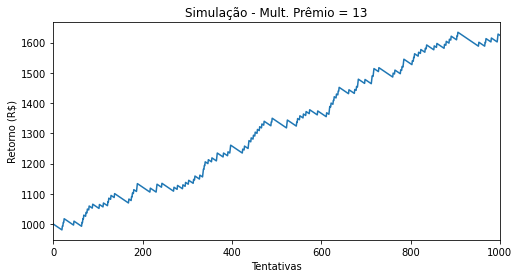

In [11]:
balance, prize_draw_runs, wins_probs, num_wins = simulate(
    max_prize_draw_runs=1000, 
    bet=1,
    prize_mult=13,
    balance_value=1000,
    function=run_nickel,
    plot=True,
    plot_details=True,
    seed=None,
)

### 4.0.2 Executando $n$ simulações para os caça níqueis
Agora, segue a versão com 10000 simulações equivalentes a anterior

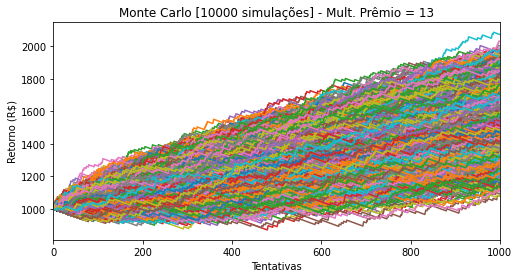

In [12]:
simulation_report = monte_carlo(num_simulations=10000, 
                                max_prize_draw_runs=1000, 
                                bet=1, 
                                prize_mult=13,
                                balance_value=1000,
                                function=run_nickel,
                                plot=True,
                                seed=None)

In [13]:
print('Probabilidade média de acerto =', round(simulation_report['average_win_prob'], 2))
print('Valor médio final ganho (R$) =', simulation_report['average_final_balance'])
print('Maior valor final ganho (R$) =', max(simulation_report['final_balances']))

Probabilidade média de acerto = 0.11
Valor médio final ganho (R$) = 1556.0552
Maior valor final ganho (R$) = 2072


Observamos que o apostador obteve, ao final das 10000 tentativas seguidas de apostar 1000 vezes seguidas, lucro, ou seja, o cassino saiu em prejuízo

### 4.1. Descrição da Aplicação
Para resolver o problema proposto, iremos executar uma simulação de Monte Carlo para diferentes valores de $c$, mais precisamente entre 1 e 10, encontrando o melhor valor que seja simultaneamente lucrativo para o cassinoe atrativo para o apostador

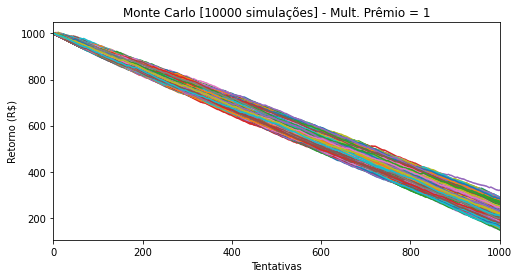

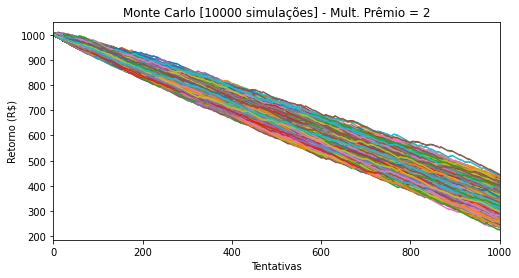

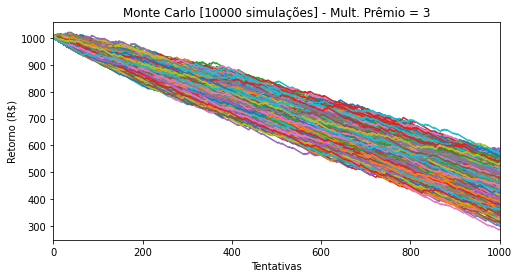

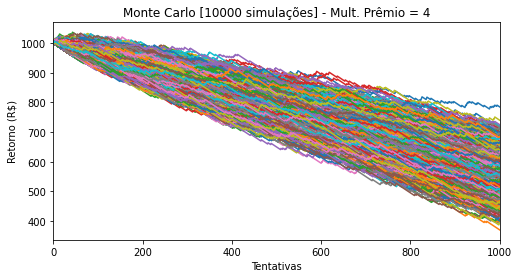

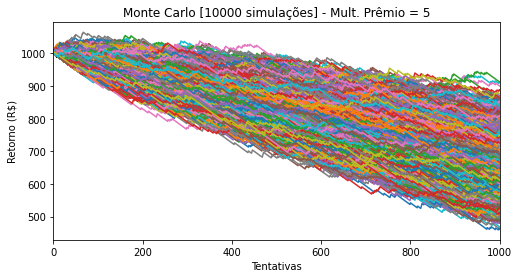

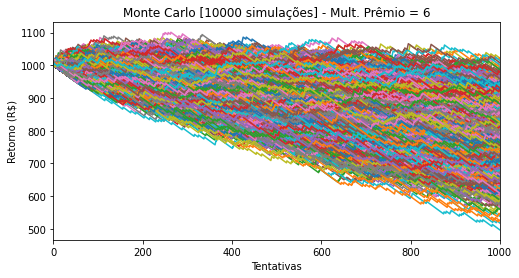

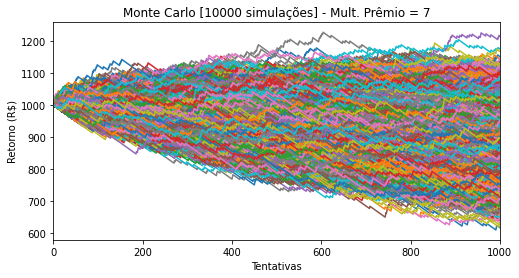

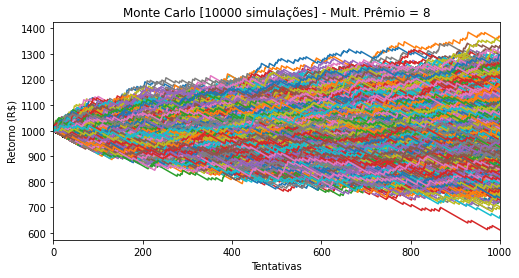

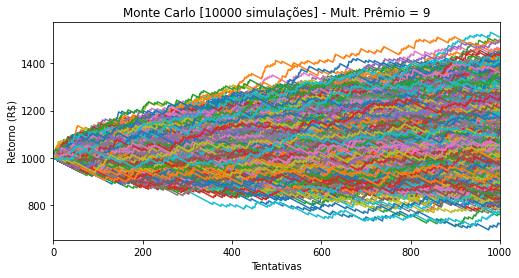

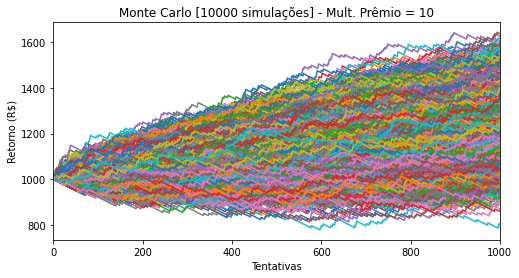

In [14]:
simulations_report = {}
for prize_mult in range(1,10+1):
    simulation_report = monte_carlo(num_simulations=10000,
                                    max_prize_draw_runs=1000,
                                    bet=1,
                                    prize_mult=prize_mult)
    
    simulations_report[prize_mult] = simulation_report

### 4.2. Análise dos Resultados
Nos gráficos acima gerados, com as simulações, observamos que os valores iniciais de $c$ (1, 2, 3, ...) são extremamente pejudiciais ao apostador. De maneira análoga, valores muito altos de $c$ (como 10) representam prejuízos para o cassino.

Abaixo, construímos uma base de dados com os resultados obtidos das simulações, onde:

- `final_win_probs`: Probabilidades finais de ganho, ao final das 1000 iterações. É uma lista de probabilidades finais para cada uma das 10000 simulações realizadas.
- `final_balances`: Semelhante ao item anterior, porém é o valor final da carteira, ao invés da probabilidade.
- `average_win_prob`: Probabilidade média de acerto, para as 10000 iterações
- `average_final_balance`: Valor médio de carteira, para as 10000 iterações

In [15]:
df = pd.DataFrame(simulations_report).transpose()
df

,final_win_probs,final_balances,average_win_prob,average_final_balance
1,"[0.107, 0.102, 0.088, 0.105, 0.103, 0.108, 0.1...","[214, 204, 176, 210, 206, 216, 246, 212, 258, ...",0.111126,222.2524
2,"[0.101, 0.102, 0.109, 0.108, 0.107, 0.111, 0.1...","[303, 306, 327, 324, 321, 333, 303, 339, 336, ...",0.111059,333.1761
3,"[0.105, 0.115, 0.1, 0.106, 0.117, 0.116, 0.122...","[420, 460, 400, 424, 468, 464, 488, 424, 392, ...",0.111111,444.4456
4,"[0.113, 0.109, 0.116, 0.105, 0.107, 0.121, 0.1...","[565, 545, 580, 525, 535, 605, 575, 495, 590, ...",0.111199,555.995
5,"[0.125, 0.103, 0.106, 0.12, 0.12, 0.121, 0.123...","[750, 618, 636, 720, 720, 726, 738, 768, 684, ...",0.111269,667.6134
6,"[0.115, 0.116, 0.134, 0.111, 0.123, 0.114, 0.1...","[805, 812, 938, 777, 861, 798, 707, 693, 721, ...",0.111204,778.4308
7,"[0.118, 0.105, 0.101, 0.093, 0.103, 0.104, 0.1...","[944, 840, 808, 744, 824, 832, 904, 736, 880, ...",0.111112,888.8952
8,"[0.102, 0.109, 0.108, 0.11, 0.102, 0.117, 0.11...","[918, 981, 972, 990, 918, 1053, 1008, 1179, 10...",0.11113,1000.1709
9,"[0.101, 0.13, 0.103, 0.107, 0.11, 0.115, 0.113...","[1010, 1300, 1030, 1070, 1100, 1150, 1130, 123...",0.111063,1110.629
10,"[0.113, 0.125, 0.114, 0.1, 0.115, 0.103, 0.119...","[1243, 1375, 1254, 1100, 1265, 1133, 1309, 107...",0.111049,1221.5434


Observamos que o valor ideal para $c$ é $c=7$, representando um prejuízo na média (ou lucro para o cassino). Ainda, esse valor proporciona lucro em alguns casos para o apostador, como demonstrado na simulação, gerando lucros acima de R\$ 1200,00 para os apostadores. Vale ressaltar que para $c=8$ temos um valor médio, onde o lucro do cassino e do apostador tende a ser nulo, ou seja, o apostador tende a menter o valor inicial de sua carteira.

Abaixo, geramos uma tabela para cada simulação de Monte Carlo realizada, para cada valor de $c$

In [16]:
dataframes = {}
for i in range(1,10+1):
    dataframe = pd.DataFrame(simulations_report[i])
    dataframe.drop(['average_win_prob','average_final_balance'], axis=1, inplace=True)
    dataframes[f'df_{i}'] = dataframe

list(dataframes.keys())

['df_1',
 'df_2',
 'df_3',
 'df_4',
 'df_5',
 'df_6',
 'df_7',
 'df_8',
 'df_9',
 'df_10']

Probabilidades finais de ganho, após as 1000 execuções, bem como valores finais de carteira para a simulação onde $c=7$

In [17]:
df_7 = dataframes['df_7']
df_7

,final_win_probs,final_balances
0,0.118,944
1,0.105,840
2,0.101,808
3,0.093,744
4,0.103,824
...,...,...
9995,0.099,792
9996,0.121,968
9997,0.115,920
9998,0.112,896


Menor e maior valor de carteira de um apostador com R\$ 1000 iniciais, após 1000 apostas

In [18]:
print(df_7['final_balances'].min())
print(df_7['final_balances'].max())

616
1216


Abaixo, observa-se a probabilidade de acerto ao final de cada uma das 1000 iterações. Observamos que o valor oscila ao redor do valor teórico de 0.11 (ou $\frac{1}{9}$)

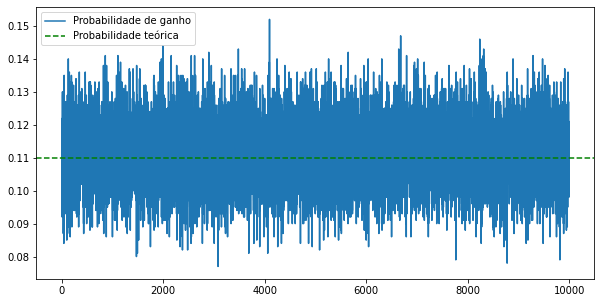

In [19]:
plt.figure(figsize=(10,5));
plt.plot(range(10000), df_7['final_win_probs'], label='Probabilidade de ganho');
plt.axhline(0.11, color='g', linestyle='--', label='Probabilidade teórica');
plt.legend();

Abaixo, realizamos uma simulação individual para analizar as probabilidades de ganhos

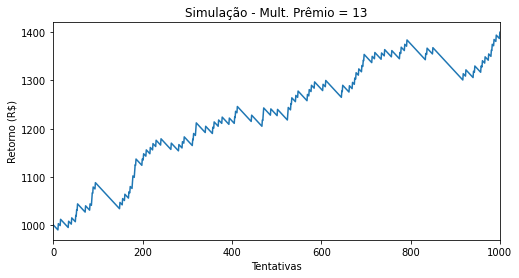

In [20]:
balance, prize_draw_runs, wins_probs, num_wins = simulate(
    max_prize_draw_runs=1000, 
    bet=1,
    prize_mult=13,
    balance_value=1000,
    function=run_nickel,
    plot=True,
    plot_details=True,
    seed=None,
)

Observa-se que a probabilidade de ganho, ao longo das 1000 iterações, tende a se aproximar do valor teórico (0.11), principalmente para maiores valores iterativos. Nesse sentido, a simulação de Monte Carlo também é utilizada como um método de aproximação

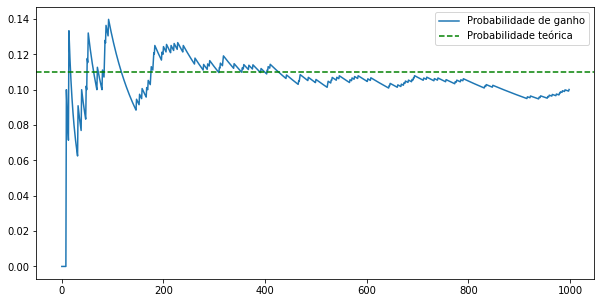

In [21]:
plt.figure(figsize=(10,5));
plt.plot(range(1000-1), wins_probs, label='Probabilidade de ganho');
plt.axhline(0.11, color='g', linestyle='--', label='Probabilidade teórica');
plt.legend();

 ## 5. **CONCLUSÃO**
 A simulação de Monte Carlo foi uma boa escolha, pois o cassino poderia perder consideravelmente dinheiro ao tentar encontrar um bom valor para $c$, por tentativa e erro, e além do risco que se corre, perderia também bastante tempo até encontrar um valor ideal. Nesse tempo perdido, também se perderia a oportunidade da inauguração, pois a solução precisava ser imediata. Nesse sentido, concluímos que a simulação de Monte Carlo é eficiente para os casos onde a reprodução real do fenômeno ou problema é inviável, seja por questões de tempo ou estrutura; conhecendo a distribuição de probabilidade referente às variáveis, conseguimos reproduzir o comportamento do sistema em massa, tomando melhores decisões. No problema apresentado, descobrimos que o melhor valor para $c$ é 7, sendo um valor atrativo para apostadores e simultaneamente lucrativo para o cassino.